# Insertion library

# Overview

In [1]:
# default modules
import sys
import math
import random
import pickle

In [2]:
# external modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
# increase figure resolution
plt.rcParams['figure.dpi'] = 200

In [4]:
# custom modules
import analysis_final as analysis
from SliderClass_final import Slider
import graph_final as graph

In [5]:
# working directory
path = "/home/spark159/../../media/spark159/sw/slide_seq_data(2021.07.14)/"

In [6]:
# basic parameters
tlen = 225 # sliding DNA template length
NCPlen = 147 # nucleosomal DNA length

In [7]:
# load WT 601 sliding data
WT_slider1 = pickle.load(open(path+'601_0min'+'.pickle'))['601']
WT_slider2 = pickle.load(open(path+'601_5min'+'.pickle'))['601']

In [8]:
# load insertion library data
insertion_sliders1 = pickle.load(open(path+'IDlib_bubble_0min_1rep'+'.pickle'))
insertion_sliders2 = pickle.load(open(path+'IDlib_bubble_5min_1rep'+'.pickle'))

In [9]:
# set target ids
common_ids = list(set(insertion_sliders1.keys()) & set(insertion_sliders2.keys()))
target_ids = []
for id in common_ids:
    loc, mtype, nts = id.split('-')
    if mtype != 'I':
        continue
    target_ids.append(id)
target_ids = sorted(target_ids, cmp=analysis.wid_cmp_len)

In [10]:
# group target ids by size
size_ids = {}
for id in target_ids:
    loc, mtype, nts = id.split('-')
    size = len(nts)
    if size not in size_ids:
        size_ids[size] = []
    size_ids[size].append(id)


Size #1bp


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


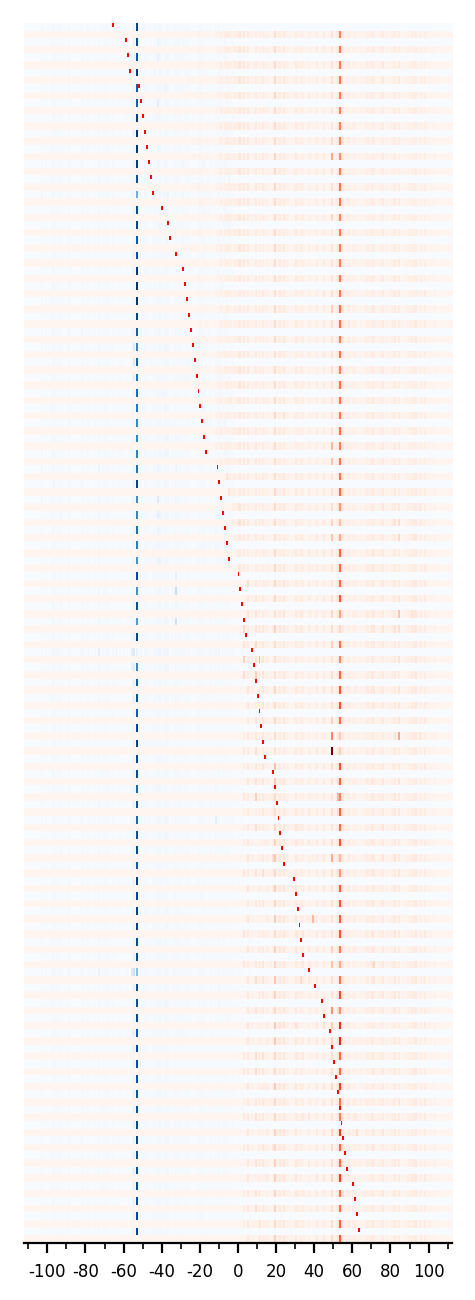

In [11]:
# plot cleavage heatmap (before)
for size in sorted(size_ids):
    print
    print "Size #%dbp" % (size)
    ids = sorted(size_ids[size], cmp=analysis.wid_cmp_len)
    graph.plot_map(insertion_sliders1, [Slider.get_top_cutmap, Slider.get_bottom_cutmap], ids=ids, 
                   mark='wid', cmap=['Blues', 'Reds'], thickness=[8,0,2], xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])


Size #1bp


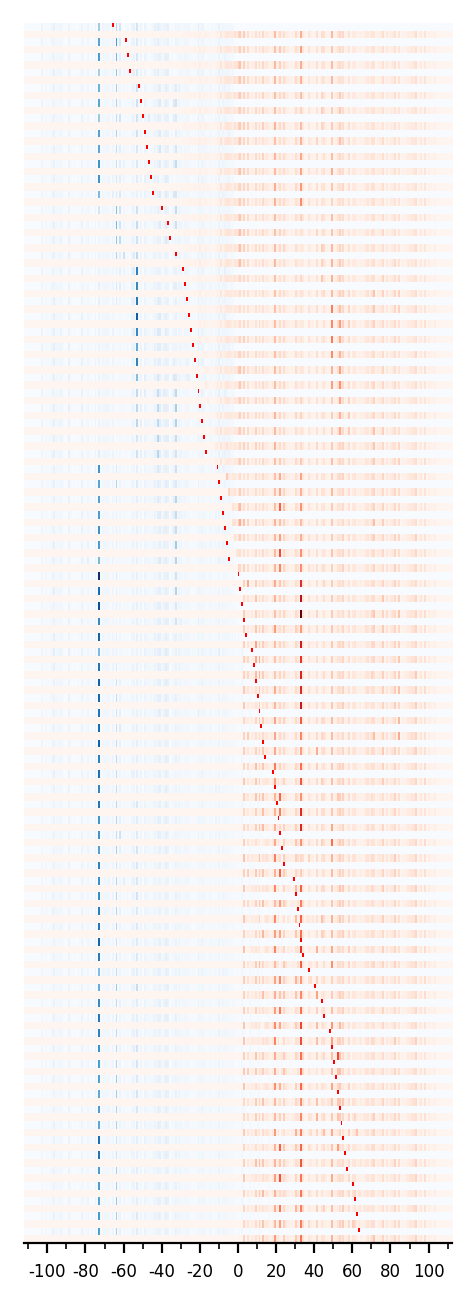

In [12]:
# plot cleavage heatmap (after)
for size in sorted(size_ids):
    print
    print "Size #%dbp" % (size)
    ids = sorted(size_ids[size], cmp=analysis.wid_cmp_len)
    graph.plot_map(insertion_sliders2, [Slider.get_top_cutmap, Slider.get_bottom_cutmap], ids=ids, 
                   mark='wid', cmap=['Blues', 'Reds'], thickness=[8,0,2],  xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])


Size #1bp


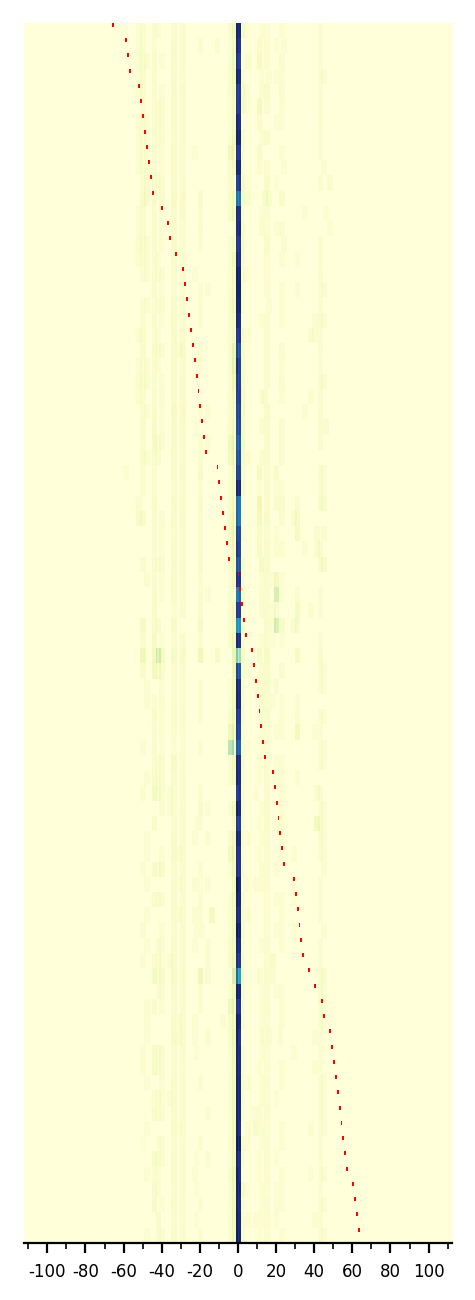

In [13]:
# plot dyad heatmap (before)
for size in sorted(size_ids):
    print
    print "Size #%dbp" % (size)
    ids = sorted(size_ids[size], cmp=analysis.wid_cmp_len)
    graph.plot_map(insertion_sliders1, Slider.highlight_peaks, ids=ids, 
                   mark='wid', cmap='YlGnBu', thickness=[8,0,2],  xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])


Size #1bp


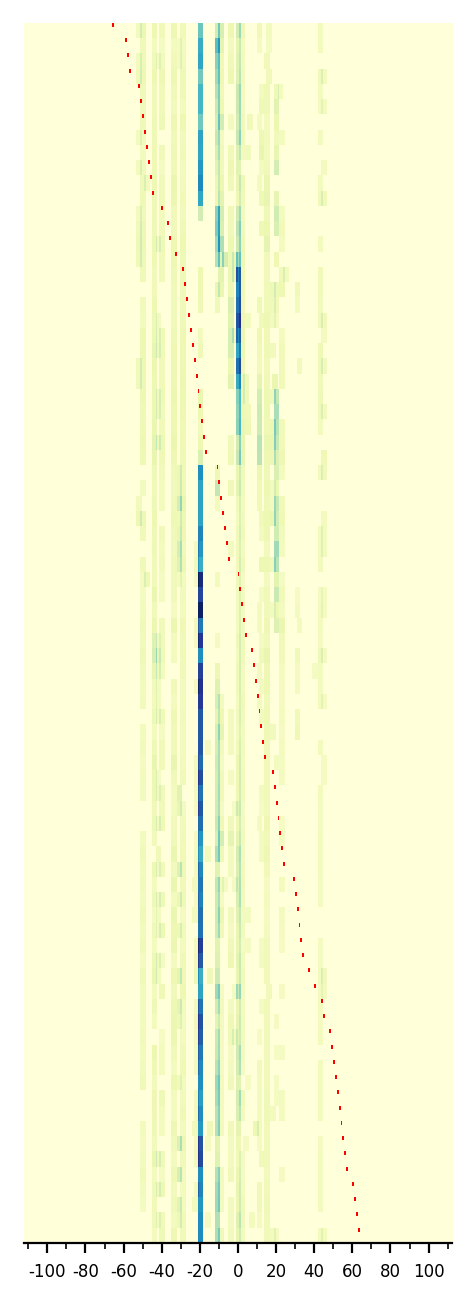

In [14]:
# plot dyad heatmap(after)
for size in sorted(size_ids):
    print
    print "Size #%dbp" % (size)
    ids = sorted(size_ids[size], cmp=analysis.wid_cmp_len)
    graph.plot_map(insertion_sliders2, Slider.highlight_peaks, ids=ids, 
                   mark='wid', cmap='YlGnBu', thickness=[8,0,2],  xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])

[1]


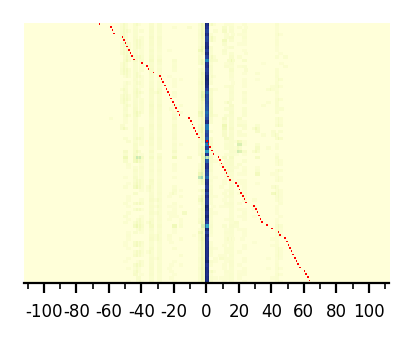

In [15]:
# plot grouped dyad heatmap (before)
group_sizes = [[size for size in sorted(size_ids.keys())]]
for i in range(len(group_sizes)):
    sizes = group_sizes[i]
    print sizes
    ids = []
    for size in sizes:
        ids += size_ids[size]
    ids = sorted(ids, cmp=analysis.wid_cmp_len)
    graph.plot_map(insertion_sliders1, Slider.highlight_peaks, ids=ids, 
                   mark='wid', cmap='YlGnBu', thickness=[2,0,1], 
                   xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])

[1]


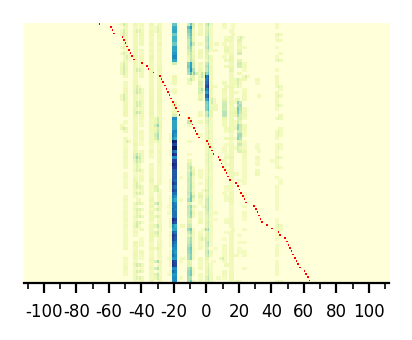

In [16]:
# plot grouped dyad heatmap (after)
group_sizes = [[size for size in sorted(size_ids.keys())]]
for i in range(len(group_sizes)):
    sizes = group_sizes[i]
    print sizes
    ids = []
    for size in sizes:
        ids += size_ids[size]
    ids = sorted(ids, cmp=analysis.wid_cmp_len)
    graph.plot_map(insertion_sliders2, Slider.highlight_peaks, ids=ids, 
                   mark='wid', cmap='YlGnBu', thickness=[2,0,1], 
                   xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])


Size #1bp


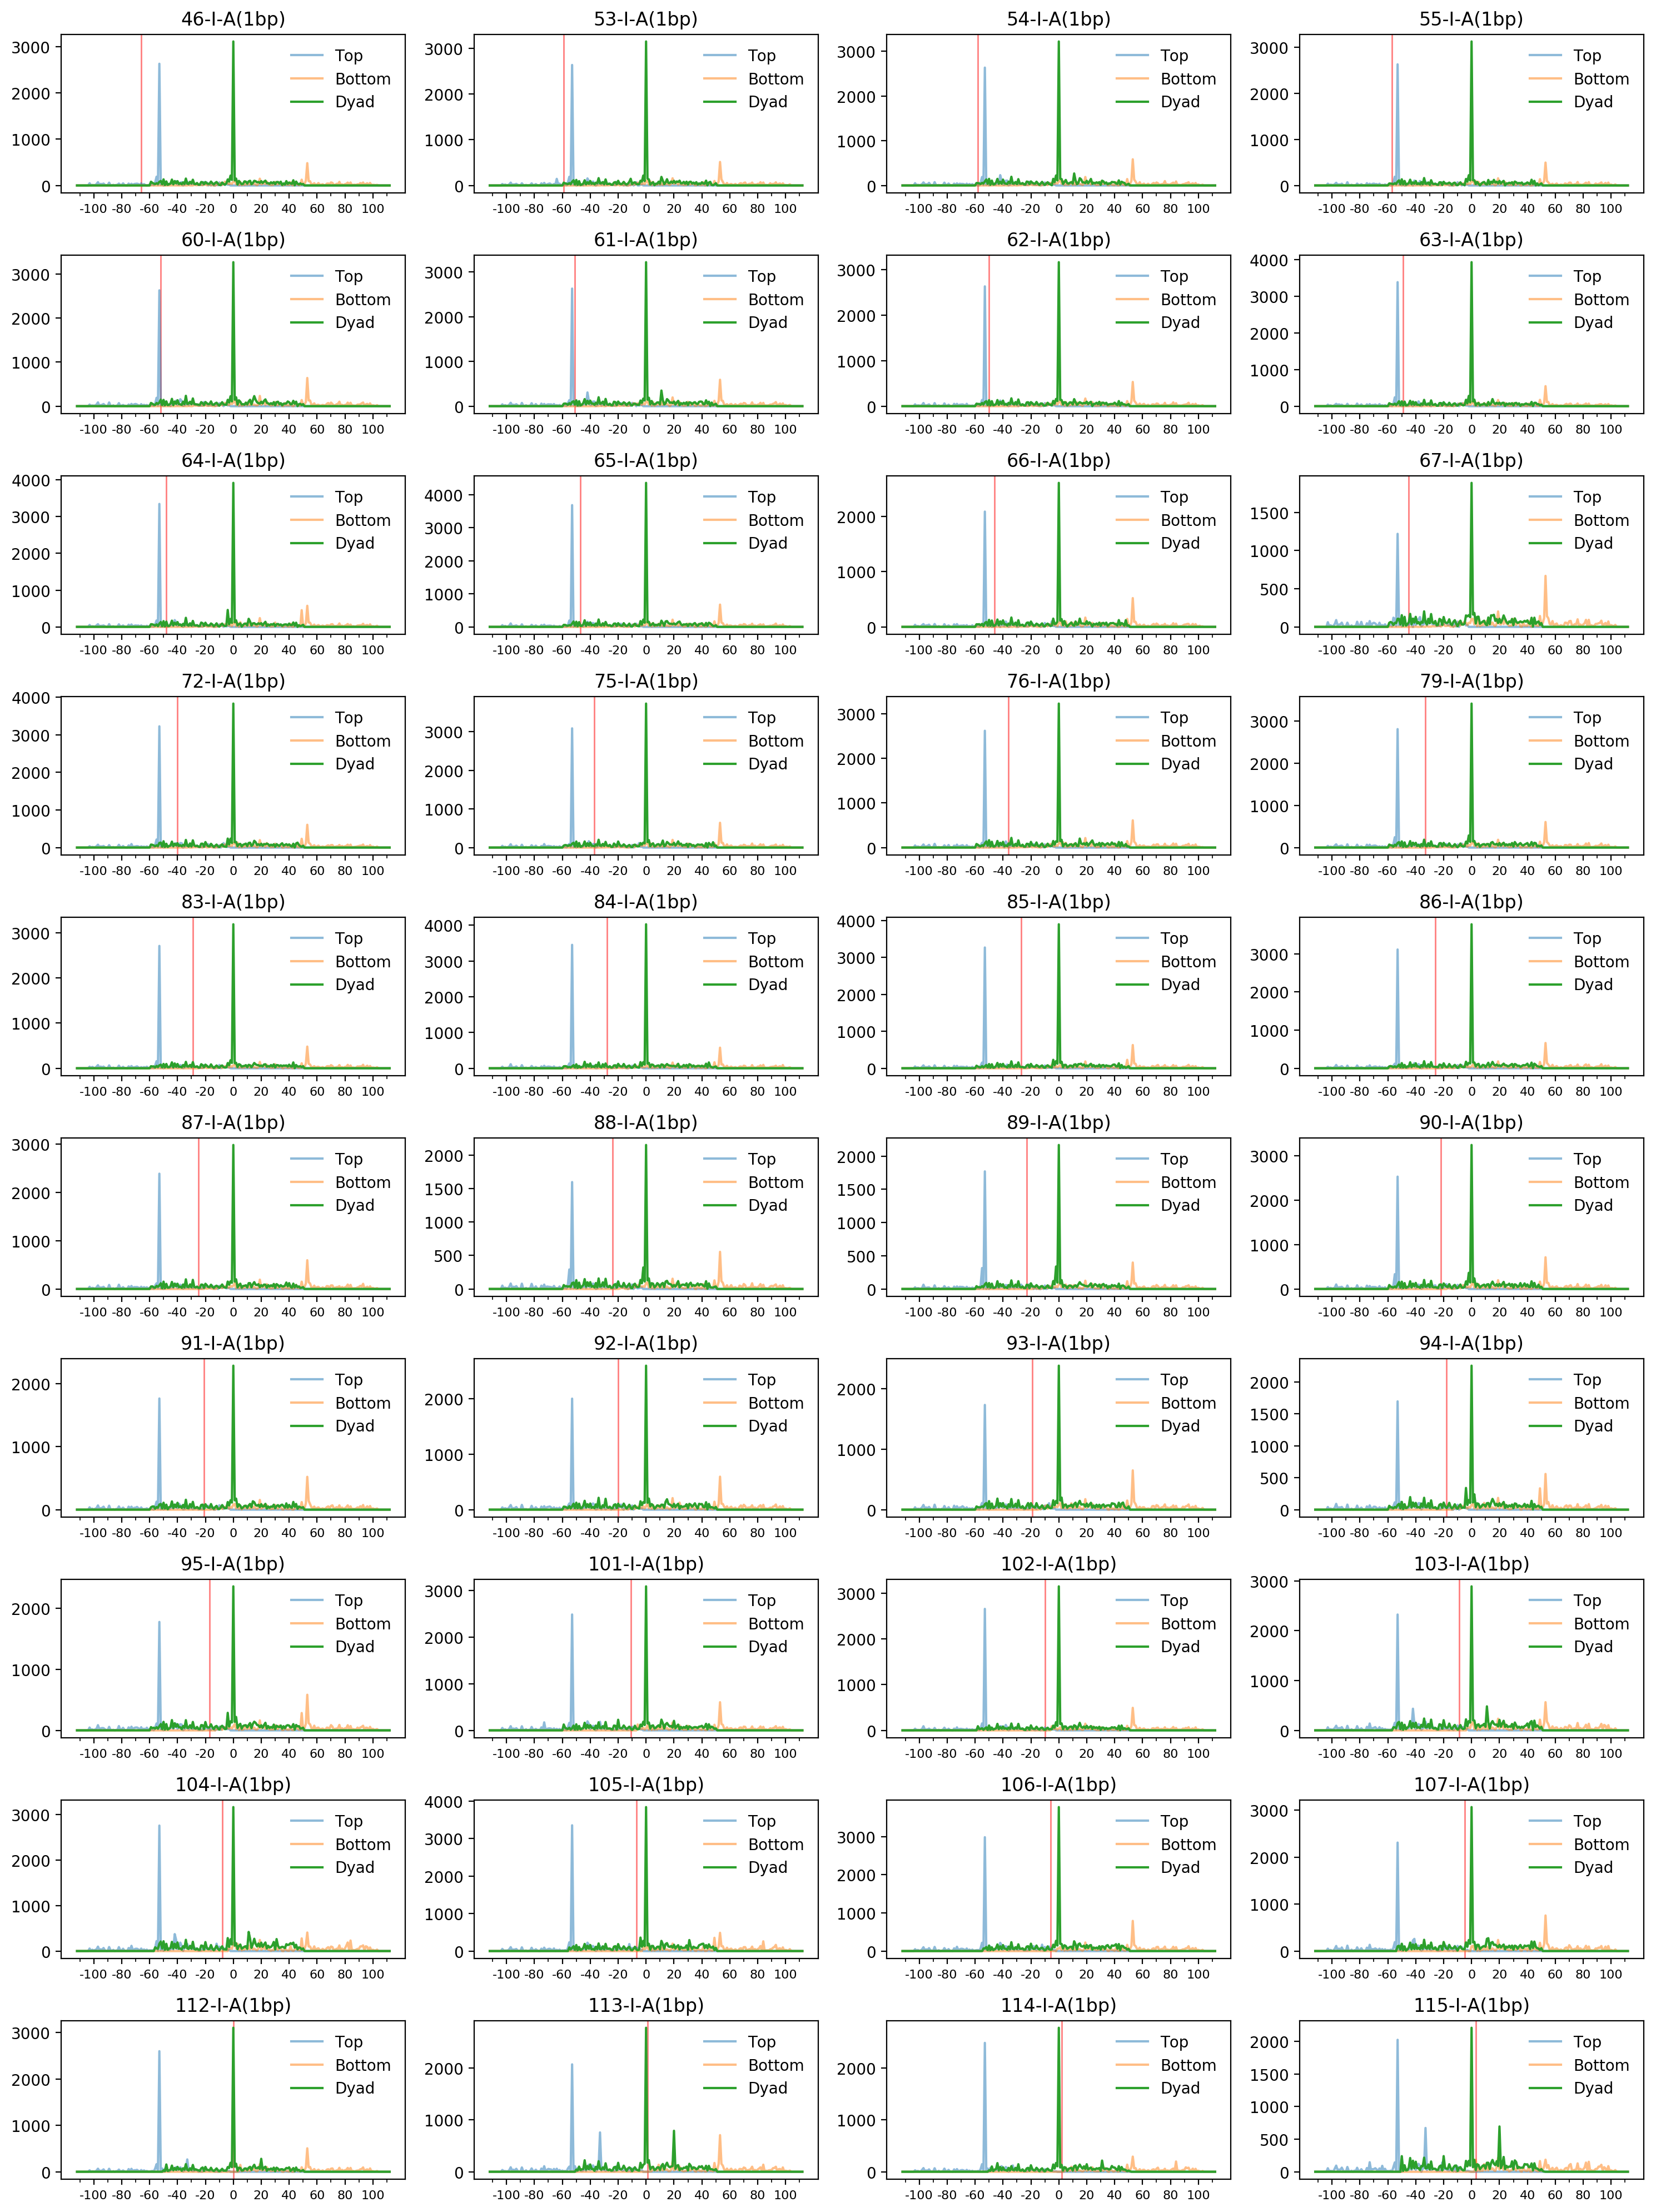

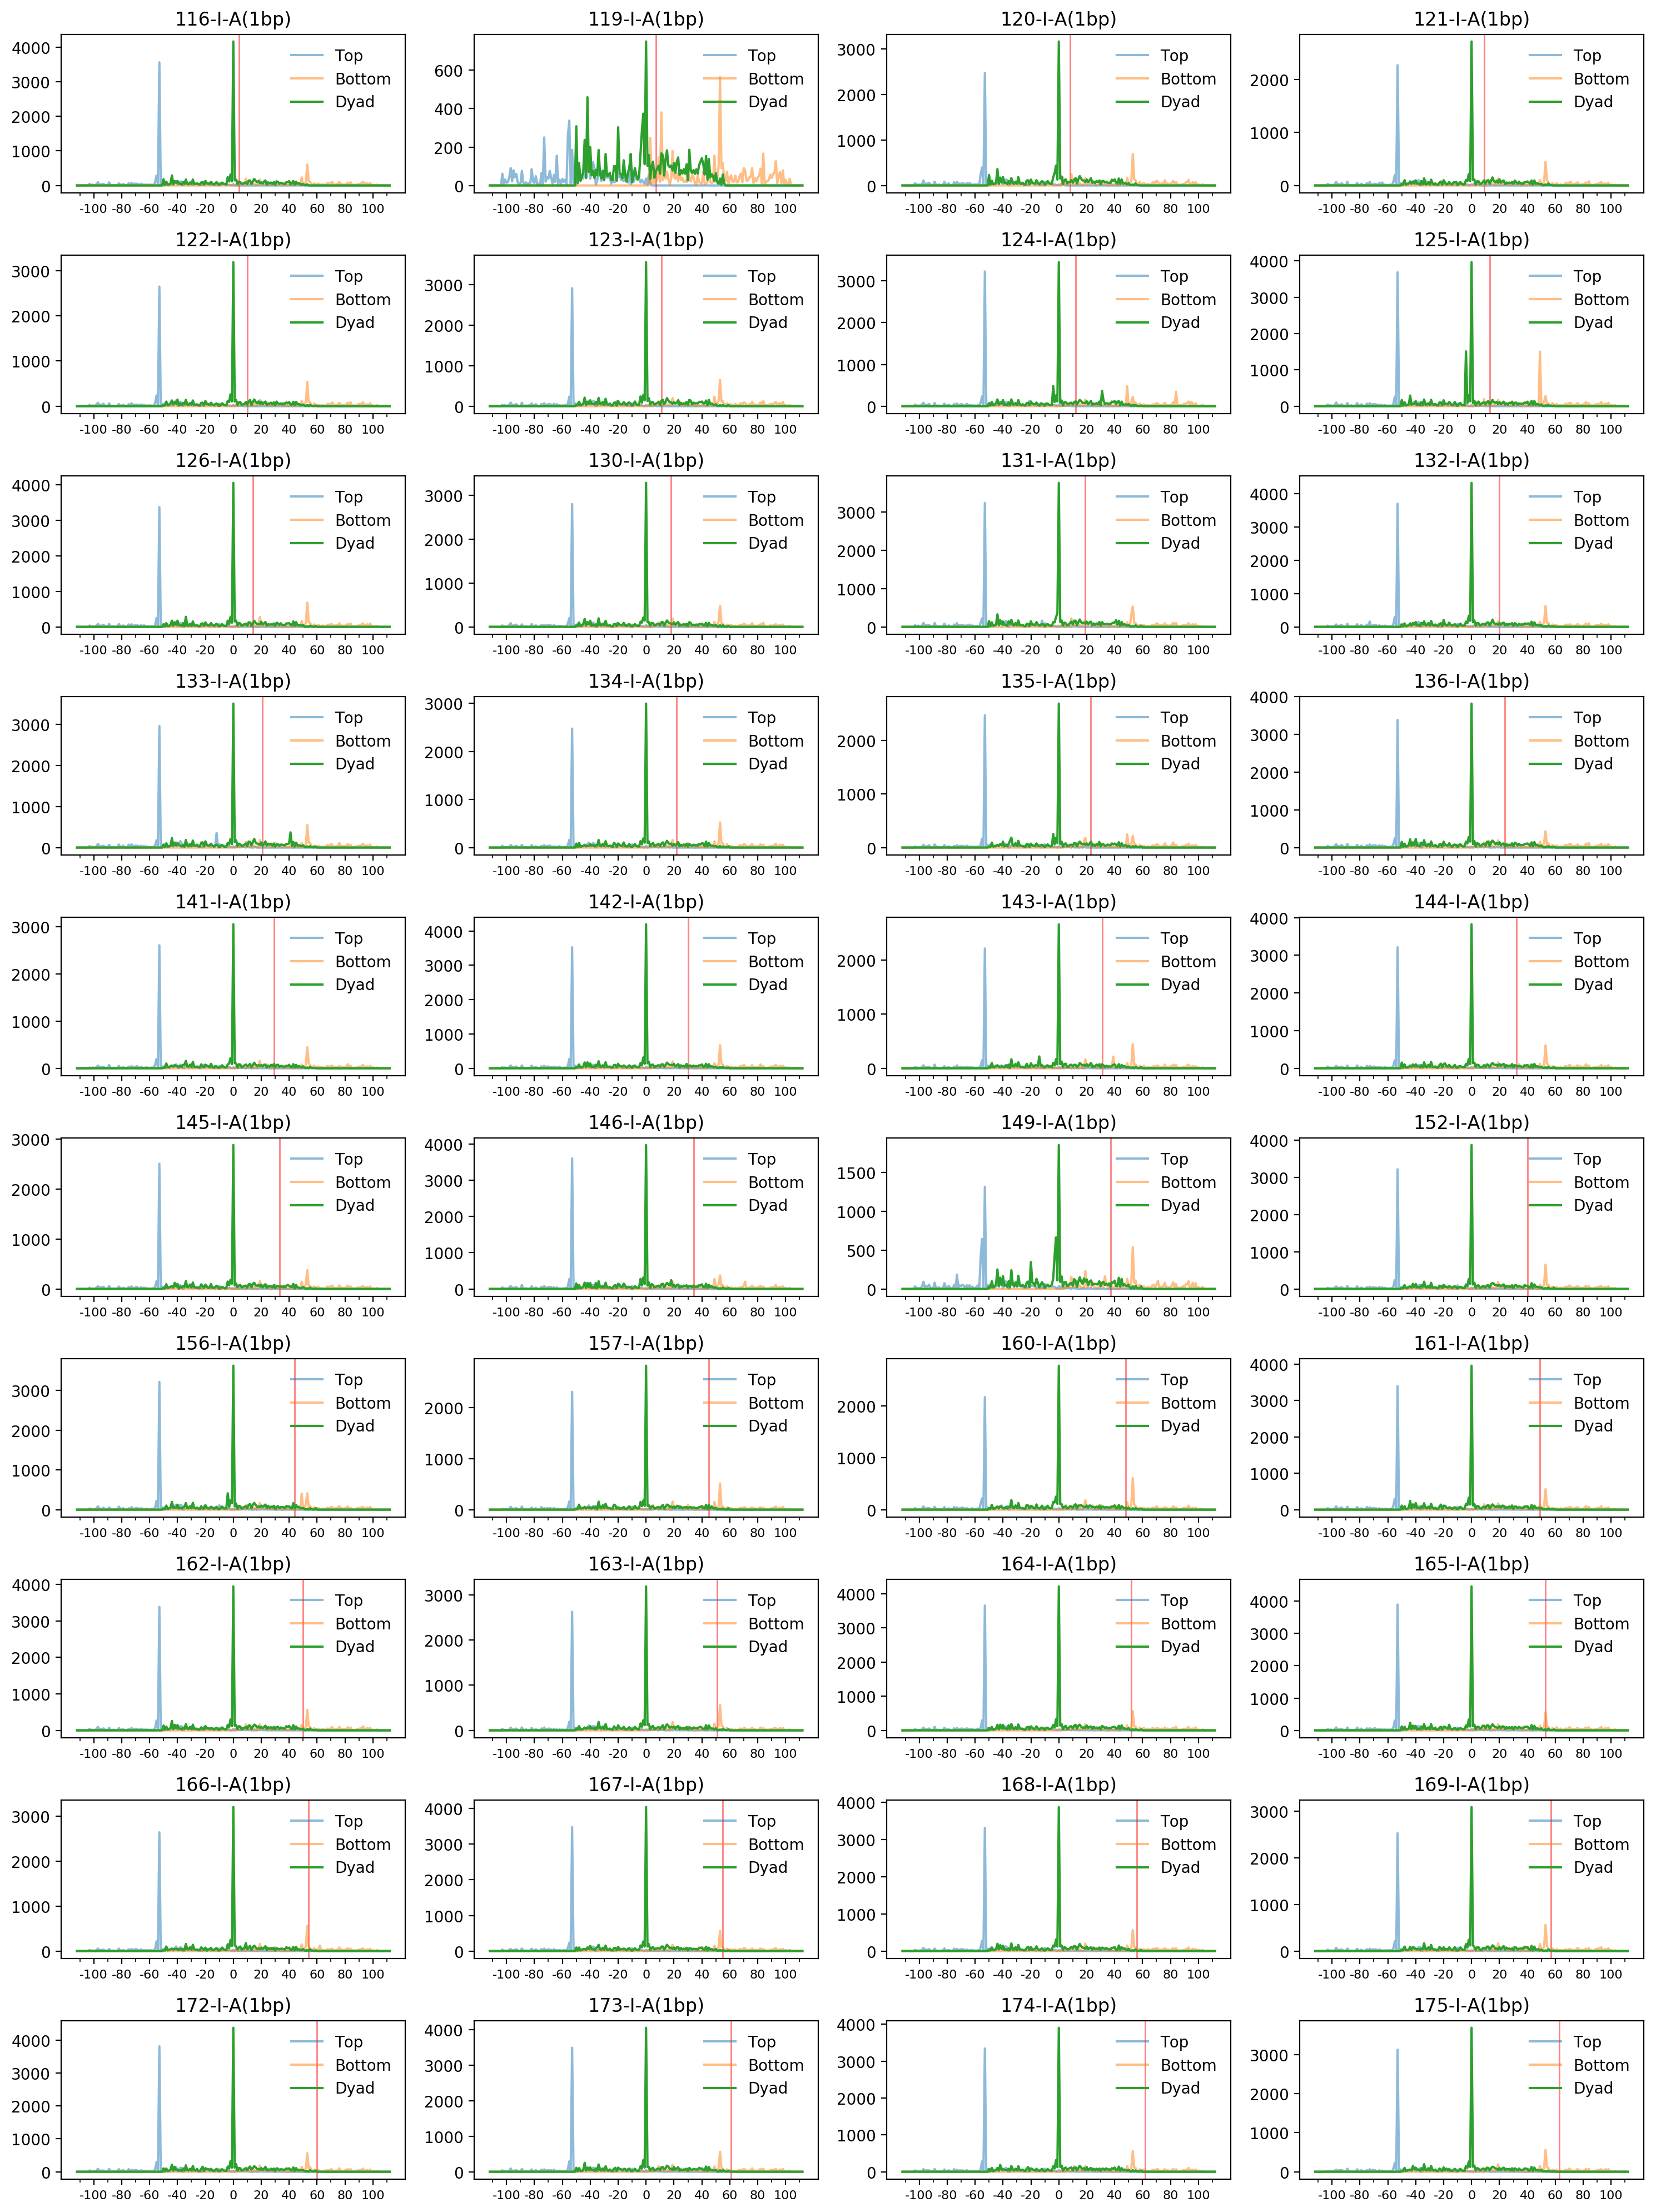

In [17]:
# plot cleavages and dyad signals (before)
for size in sorted(size_ids):
    print
    print "Size #%dbp" % (size)
    ids = sorted(size_ids[size], cmp=analysis.wid_cmp_len)
    graph.plot_sig(insertion_sliders1, [Slider.get_top_cutmap, Slider.get_bottom_cutmap, Slider.get_dyadmap], 
                   ids=ids, mark='wid', label=['Top', 'Bottom', 'Dyad'], alpha=[0.5, 0.5, 1],  xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])


Size #1bp


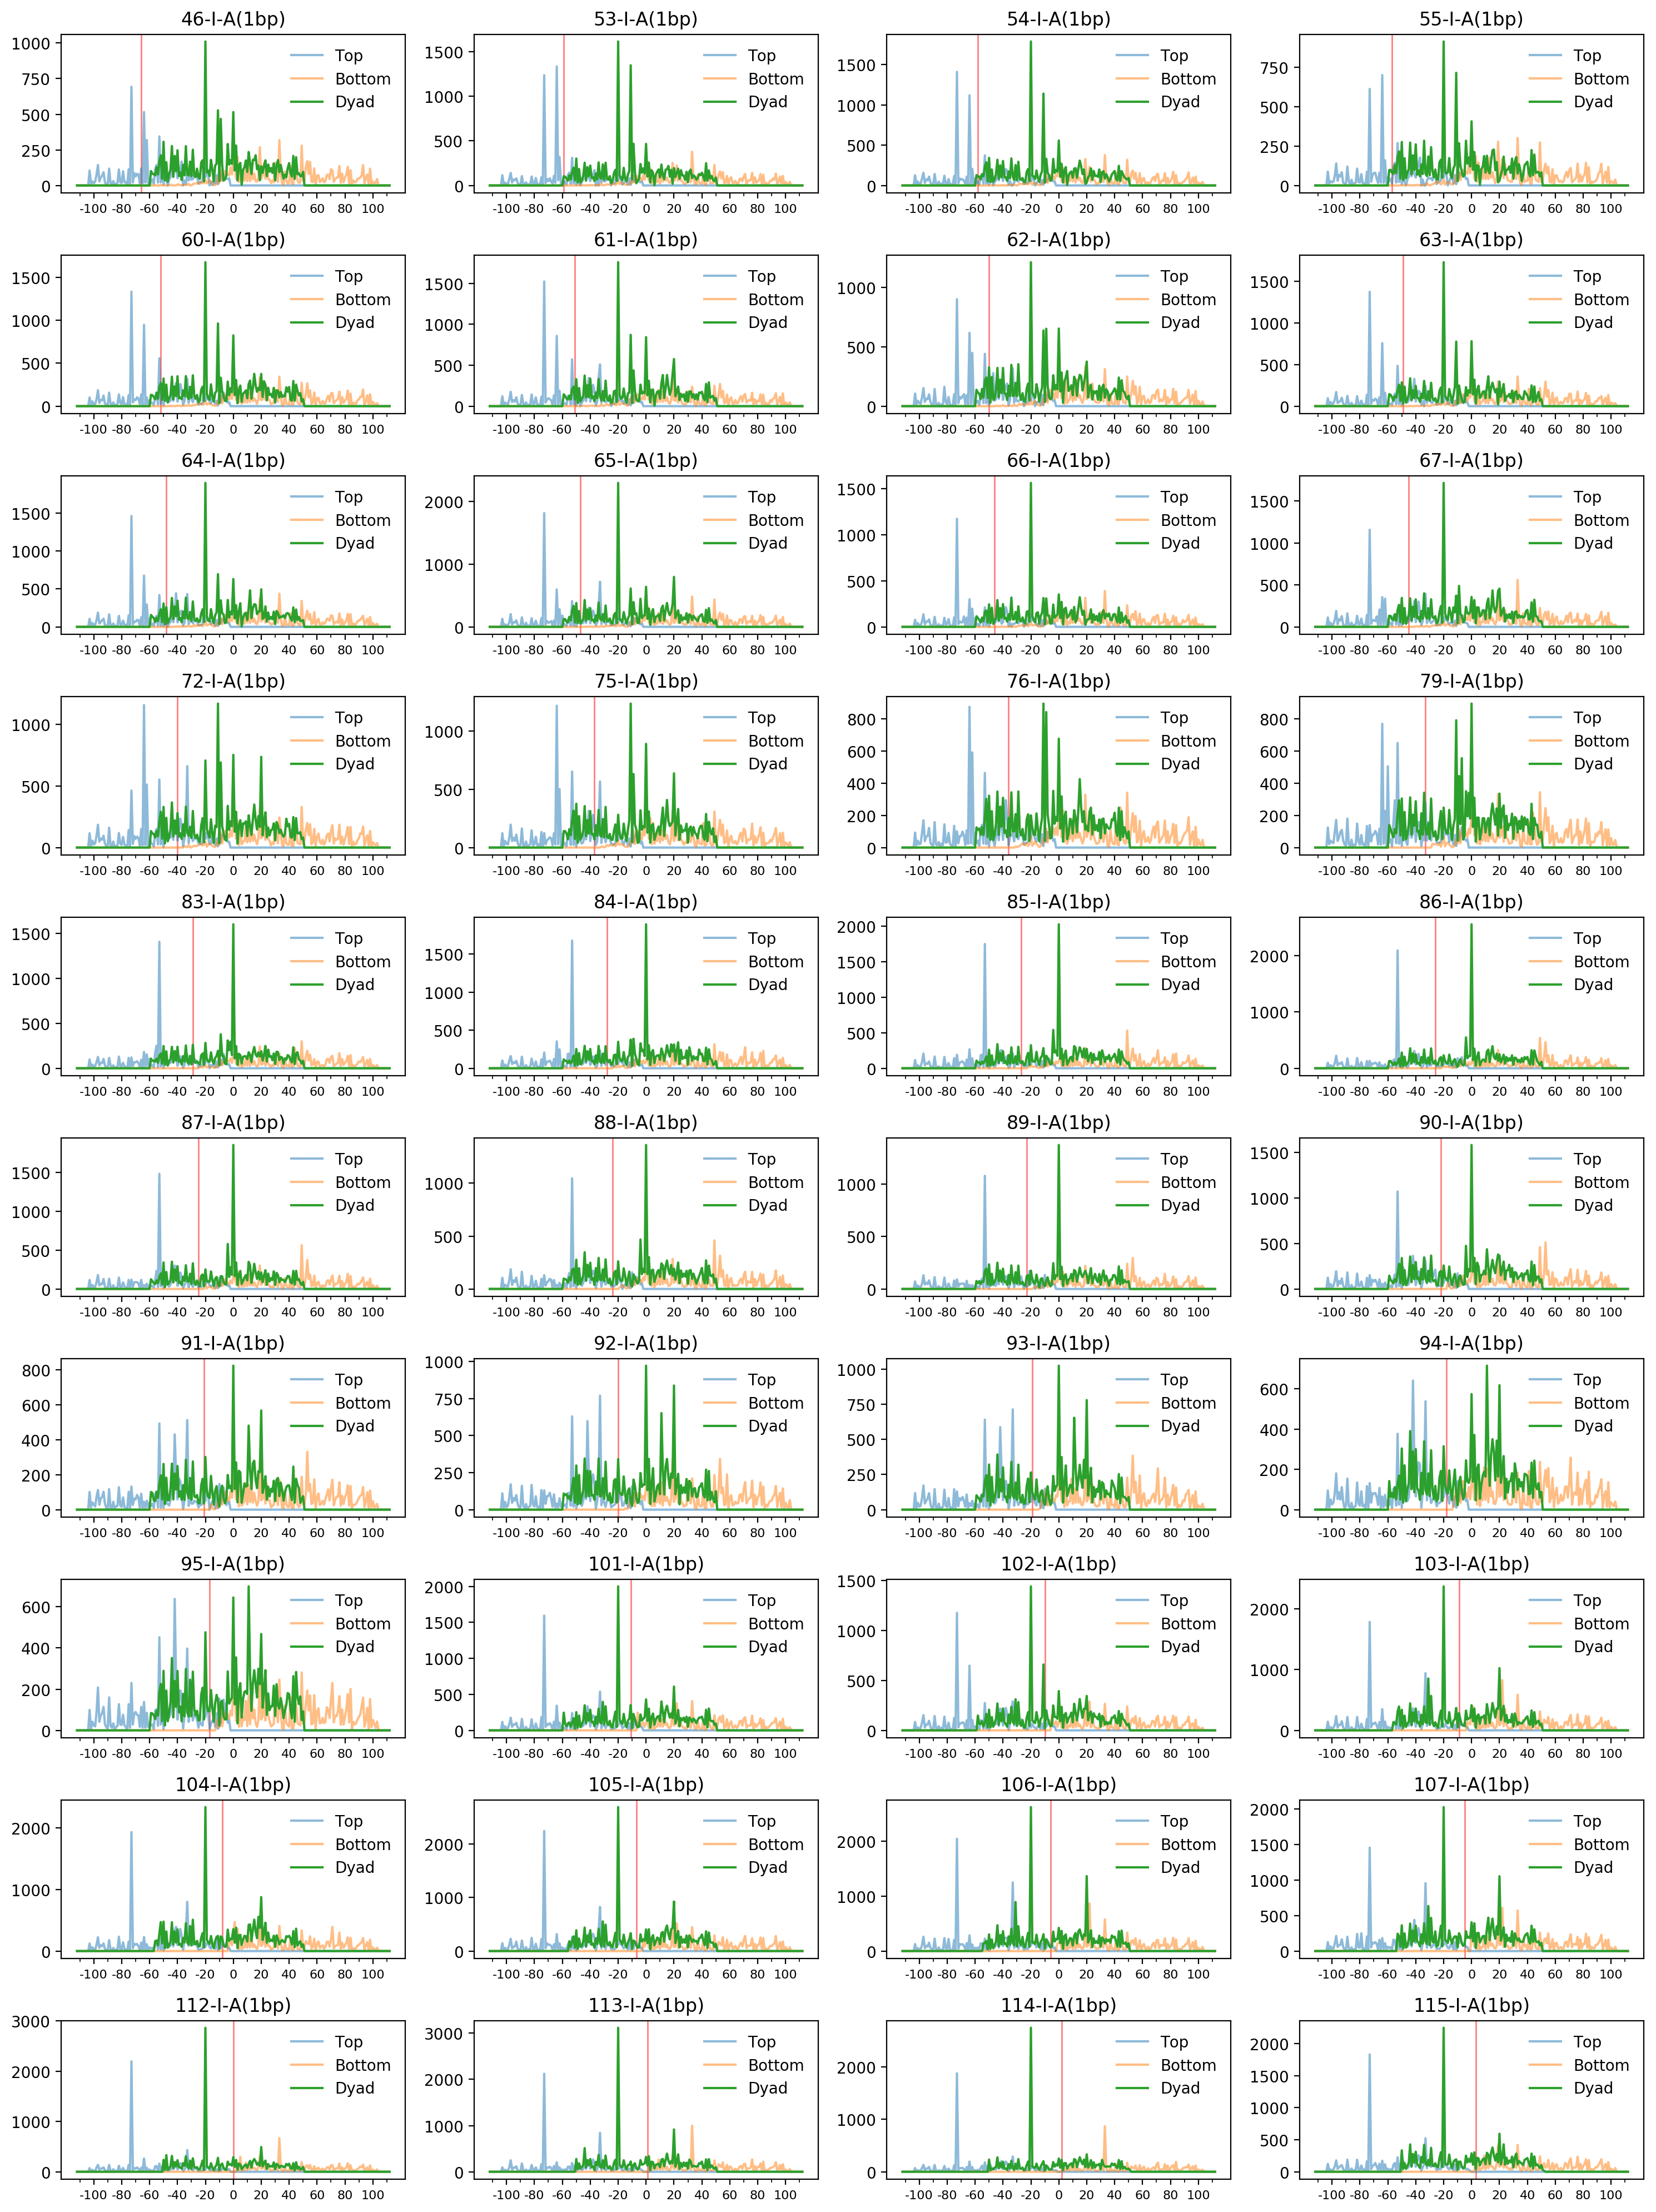

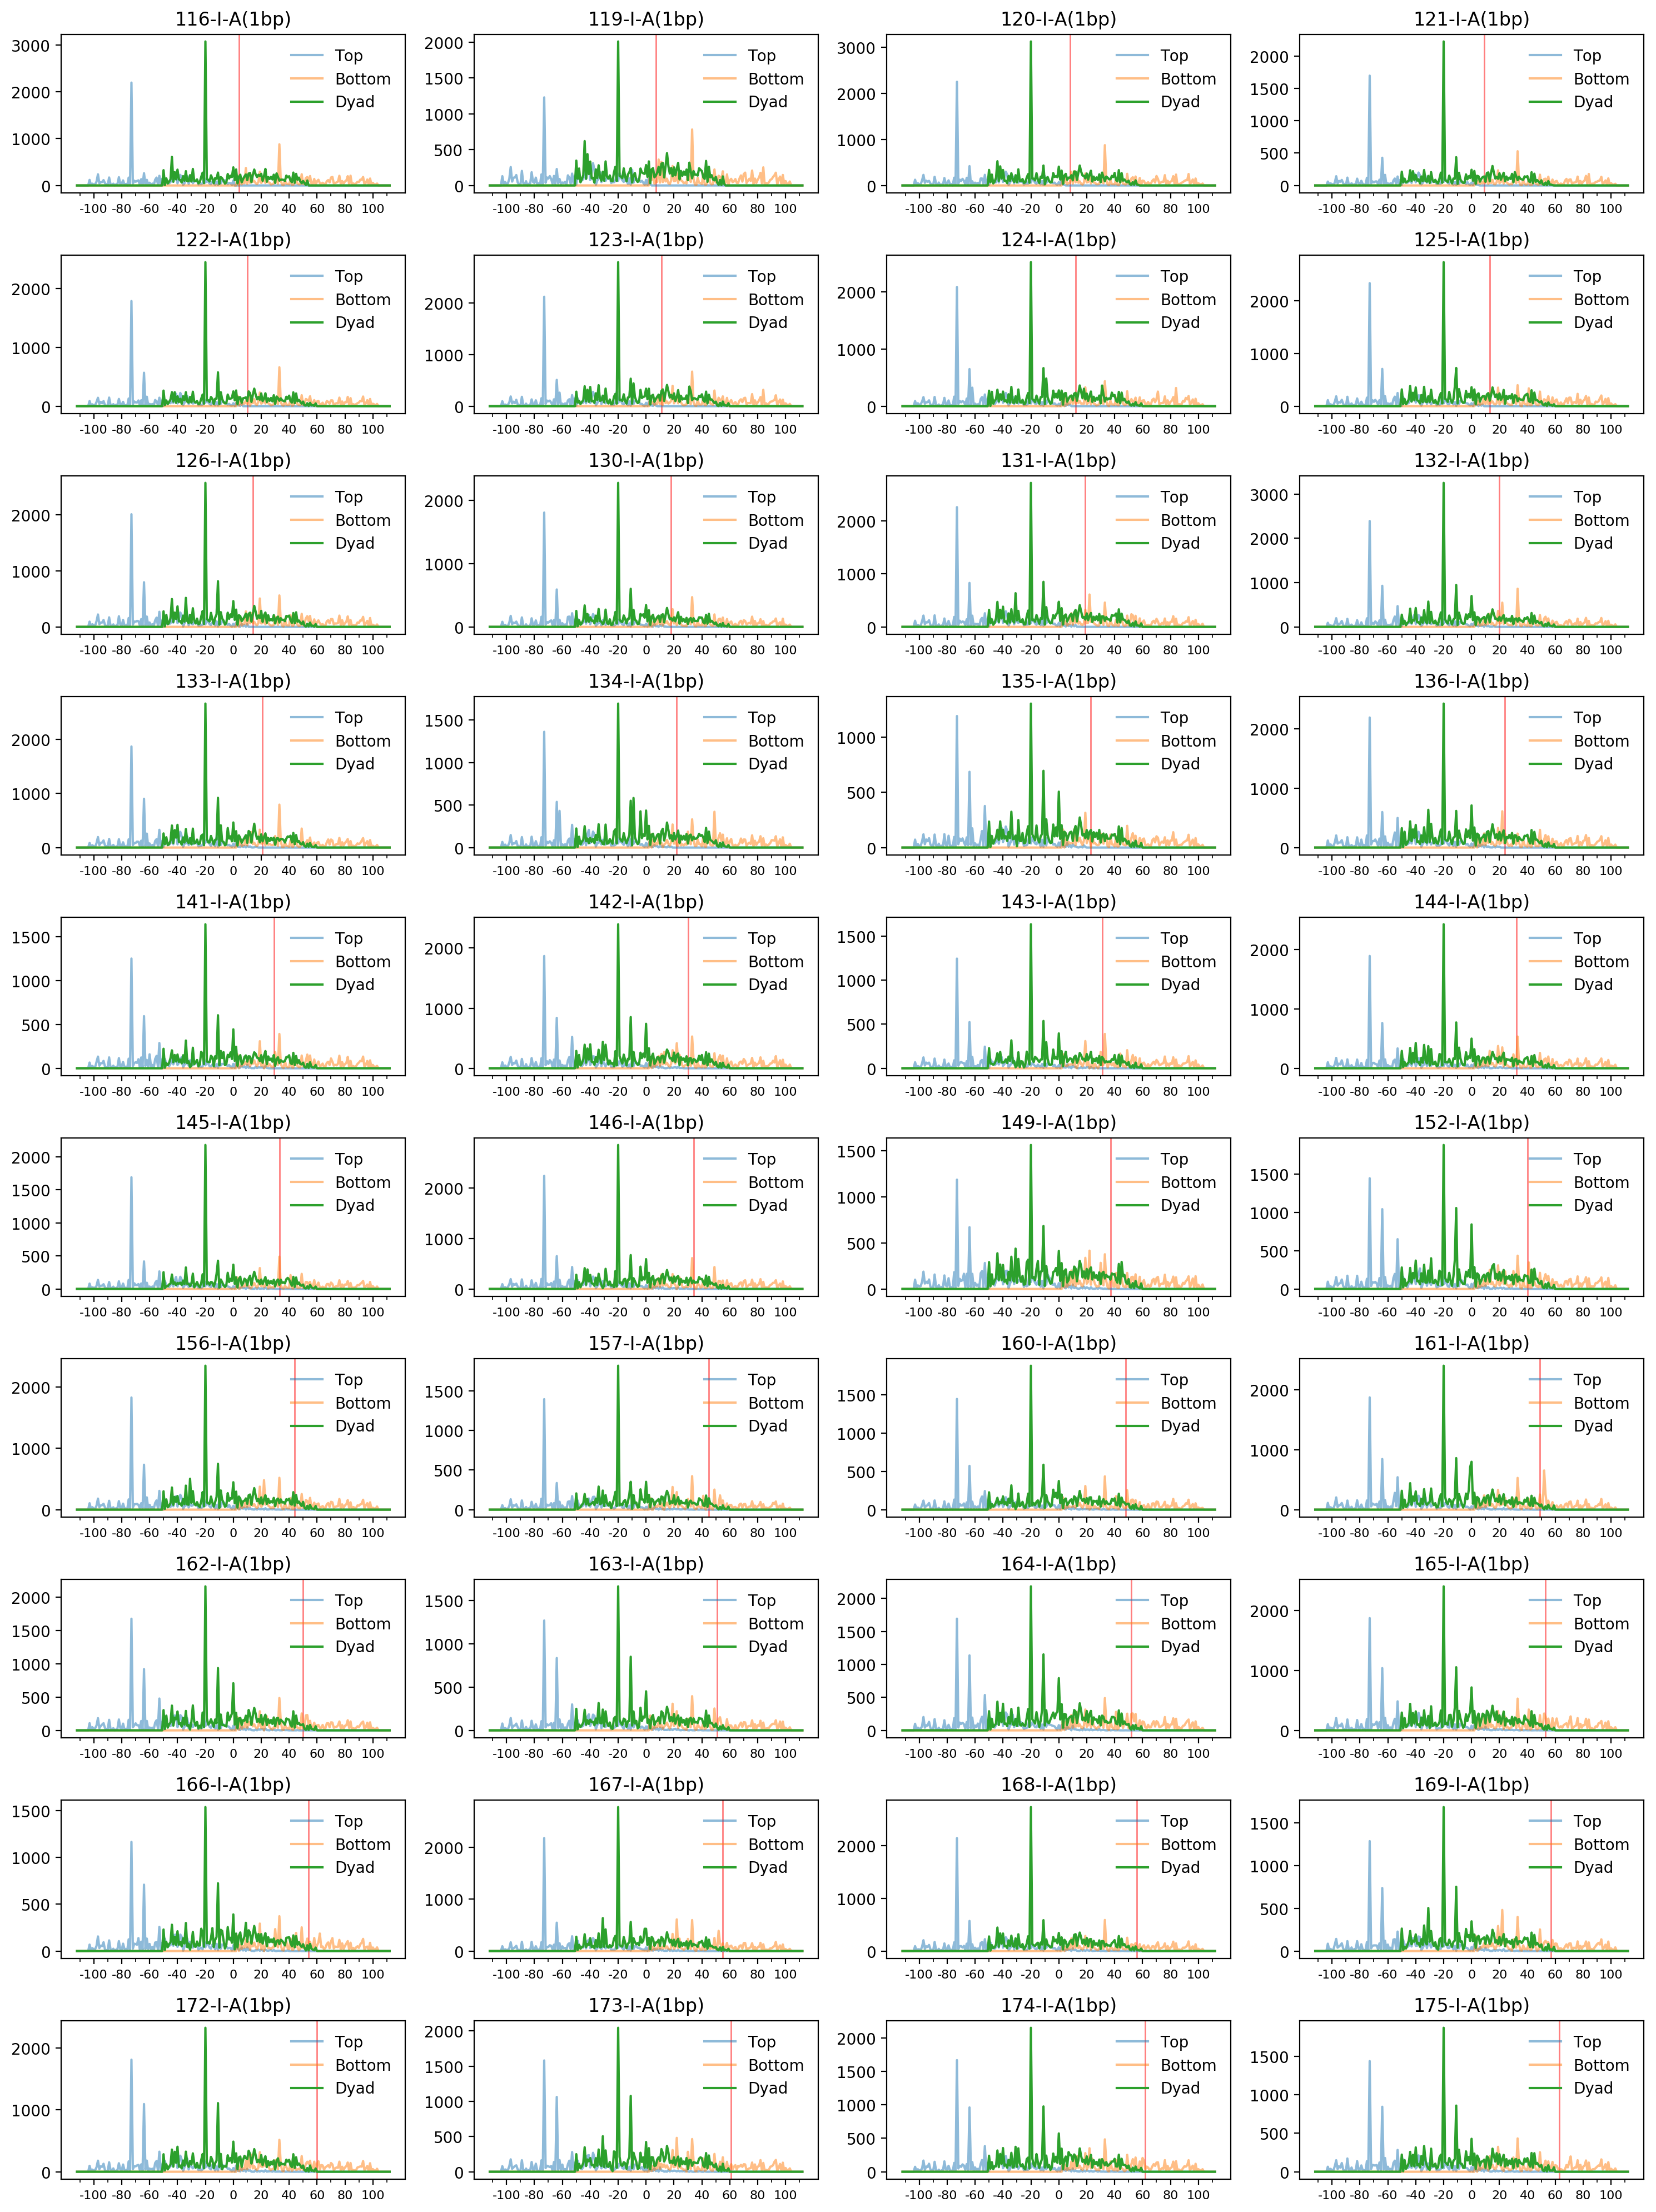

In [18]:
# plot cleavages and dyad signals (after)
for size in sorted(size_ids):
    print
    print "Size #%dbp" % (size)
    ids = sorted(size_ids[size], cmp=analysis.wid_cmp_len)
    graph.plot_sig(insertion_sliders2, [Slider.get_top_cutmap, Slider.get_bottom_cutmap, Slider.get_dyadmap], 
                   ids=ids, mark='wid', label=['Top', 'Bottom', 'Dyad'], alpha=[0.5, 0.5, 1],  xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])

In [19]:
# save cleavages and dyad signals (before)
graph.plot_sig(insertion_sliders1, ids=sorted(target_ids, cmp=analysis.wid_cmp_len), obs_func=[Slider.get_top_cutmap, Slider.get_bottom_cutmap, Slider.get_dyadmap], mark='wid', label=['Top', 'Bottom', 'Dyad'], alpha=[0.5, 0.5, 1],  xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]], note='_insertionbefore', save='pdf')

In [20]:
# save cleavages and dyad signals (after)
graph.plot_sig(insertion_sliders2, ids=sorted(target_ids, cmp=analysis.wid_cmp_len), obs_func=[Slider.get_top_cutmap, Slider.get_bottom_cutmap, Slider.get_dyadmap], mark='wid', label=['Top', 'Bottom', 'Dyad'], alpha=[0.5, 0.5, 1],  xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]], note='_insertionafter', save='pdf')